### Importing necessary  packages.

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier

import numpy as np
import os
import importlib
import sys

module_path = os.path.dirname( os.getcwd()) #Find the directory where we can find the 'Modules' library.
sys.path.append(module_path)

import Modules.Classes as Classes
import importlib

importlib.reload(Classes) #Reload the custom module to avoid clicking "Restart" every time I have changed "Modules.Classes" file.



<module 'Modules.Classes' from 'c:\\Users\\pawel\\OneDrive\\Życie\\Praca\\Programowanie\\AllGitHubRepositories\\Wsp-pracaNaukowa\\Modules\\Classes.py'>

### Defining constants for the models.

In [111]:
#The datatype of each feature of the dataframe.
dtypes = { "Make": "string", 
            "Model":"string",
            "Vehicle Class":"string",
            "Engine Size(L)":np.float64,
            "Cylinders":np.int8,
            "Transmission":"string",
            "Fuel Type":"string",
            "Fuel Consumption City (L/100 km)":np.float64,
            "Fuel Consumption Hwy (L/100 km)":np.float64,
            "Fuel Consumption Comb (L/100 km)":np.float64,
            "Fuel Consumption Comb (mpg)":np.float64,
            "CO2 Emissions(g/km)":np.float64}


# Define the dictionary of  ML models we will be training.
Models = {
    "DecTree": DecisionTreeClassifier(criterion="gini", splitter="best", min_samples_split=2), 
    "RanFor": RandomForestClassifier(n_estimators=15, criterion='gini'), 
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "LogReg": LogisticRegression(max_iter = 200,),
   "LinReg":Classes.MultiOutputLinearRegression(LinearRegression())
}    

#For each ML model create it's corresponding parameter space.
Models_hipparams = {"DecTree":{"criterion":['gini','entropy'],
                                        "splitter":['best','random'],
                                        "min_samples_split":[2,3],
                                         "min_samples_leaf":[2,3]},

                     "RanFor":{"n_estimators":list(range(5, 25, 5)),
                                         "min_samples_split":[2,3],
                                        "min_samples_leaf":[2,3]},
                                       
                  "KNN": {"n_neighbors":list(range(1, 10, 2)),
                             "p":[1,2]},
                             
                         "LogReg": {
                         "max_iter":[250, 300],
                             "penalty":['l2'],
                               "solver":['liblinear','newton-cg',],
                              
                         },
                     "LinReg":{},
                             }



### Exploratory Data Analysis (EDA) section.

In [112]:

target_var: str = "CO2 Emissions(g/km)" #The target variable's name
file_name:str = "CO2Emission.csv" #The filename


n_splits:int =30 # How many times we'll be learning each model.
train_size:float = 0.8 #The size of training set
test_size:float  = 1 - train_size #The size of testing set.

progi:tuple[int] = (-float("inf"), 150, 250, float("inf")) #Progi klas emisyjności dwutlenku węgla.

ModelComparator = Classes.ModelComparator(Filename = file_name, target_var = target_var, dtypes = dtypes, 
                                        Models = Models, Models_hipparams = Models_hipparams, 
                                        n_splits = n_splits, train_size  = train_size, test_size = test_size, 
                                        bins = progi, show_plots = False, quartile_discr = False, quartile_classes = None
                                        )

ModelComparator.descriptive_statistics()


### Training-the-models section.

In [113]:
ModelComparator.train_models()

Iteration no 0
Iteration no 1
Iteration no 2
Iteration no 3
Iteration no 4


### Visualization the results section.

c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Wsp-pracaNaukowa\Modules\Classes.py:892: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = metrics_dataframe_melted, y = "metric_value", x = "train_type",ax = boxplot_axes,
c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Wsp-pracaNaukowa\Modules\Classes.py:892: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = metrics_dataframe_melted, y = "metric_value", x = "train_type",ax = boxplot_axes,
c:\Users\pawel\OneDrive\Życie\Praca\Programowanie\AllGitHubRepositories\Wsp-pracaNaukowa\Modules\Classes.py:892: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

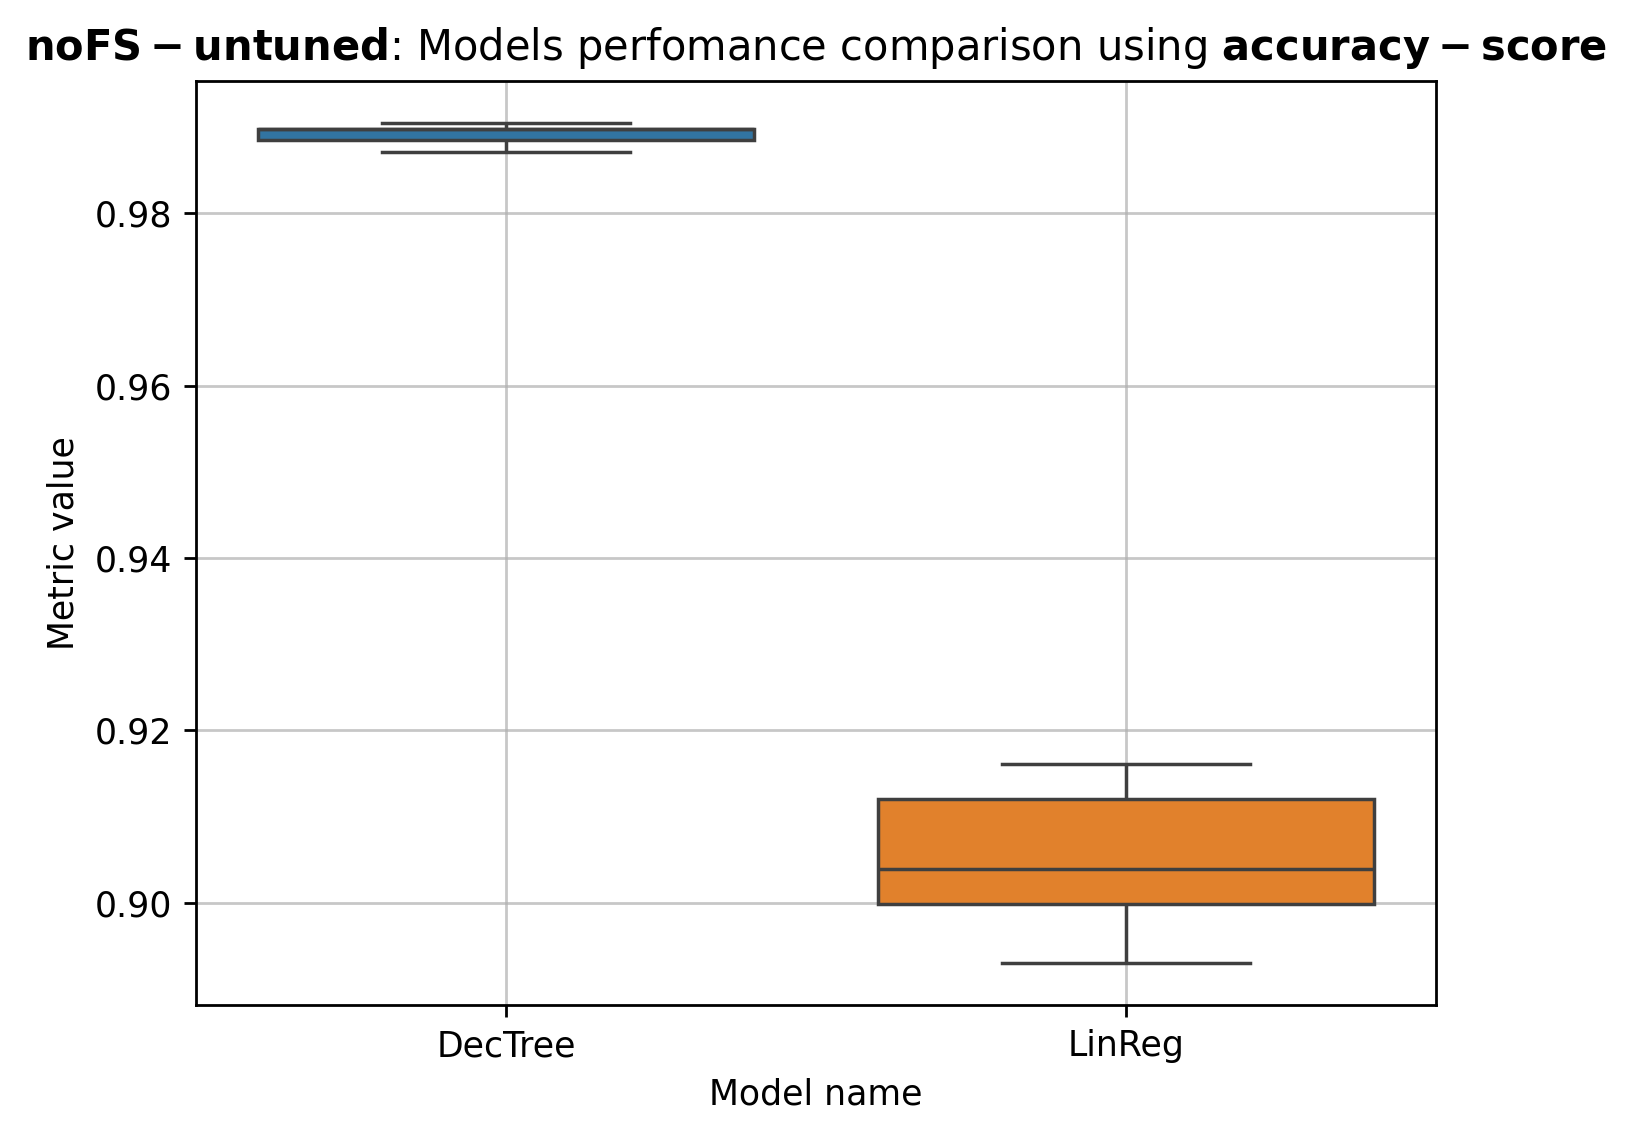

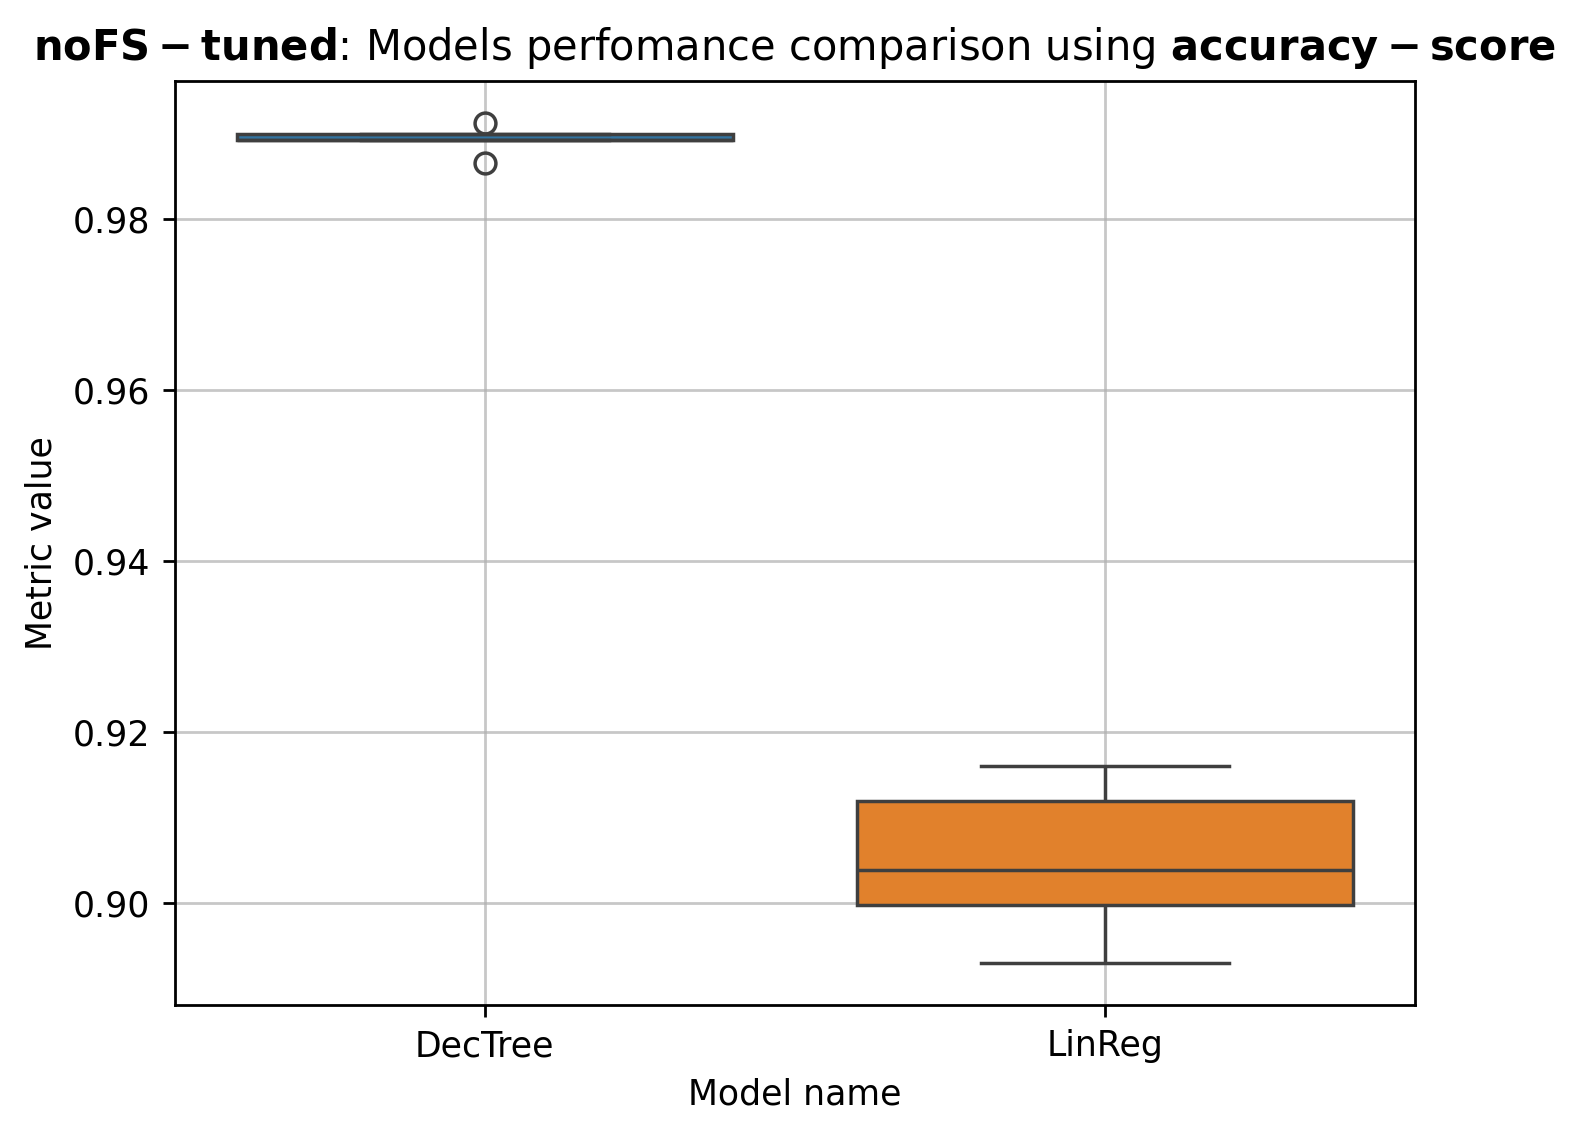

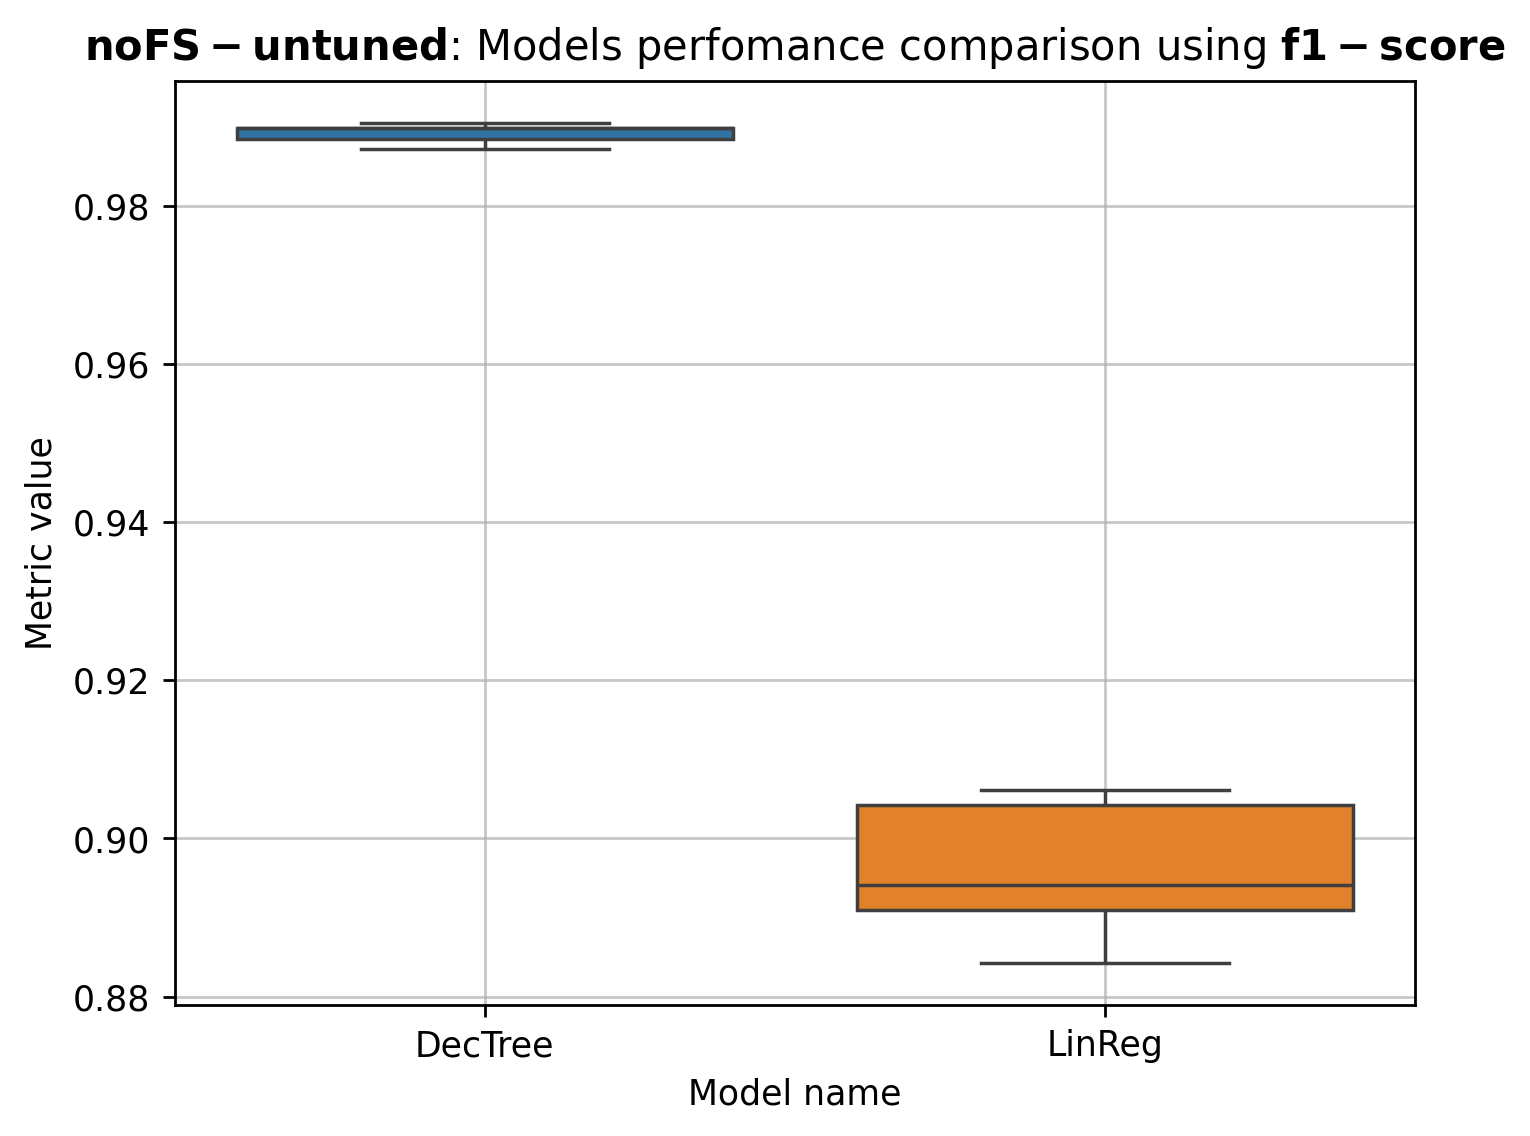

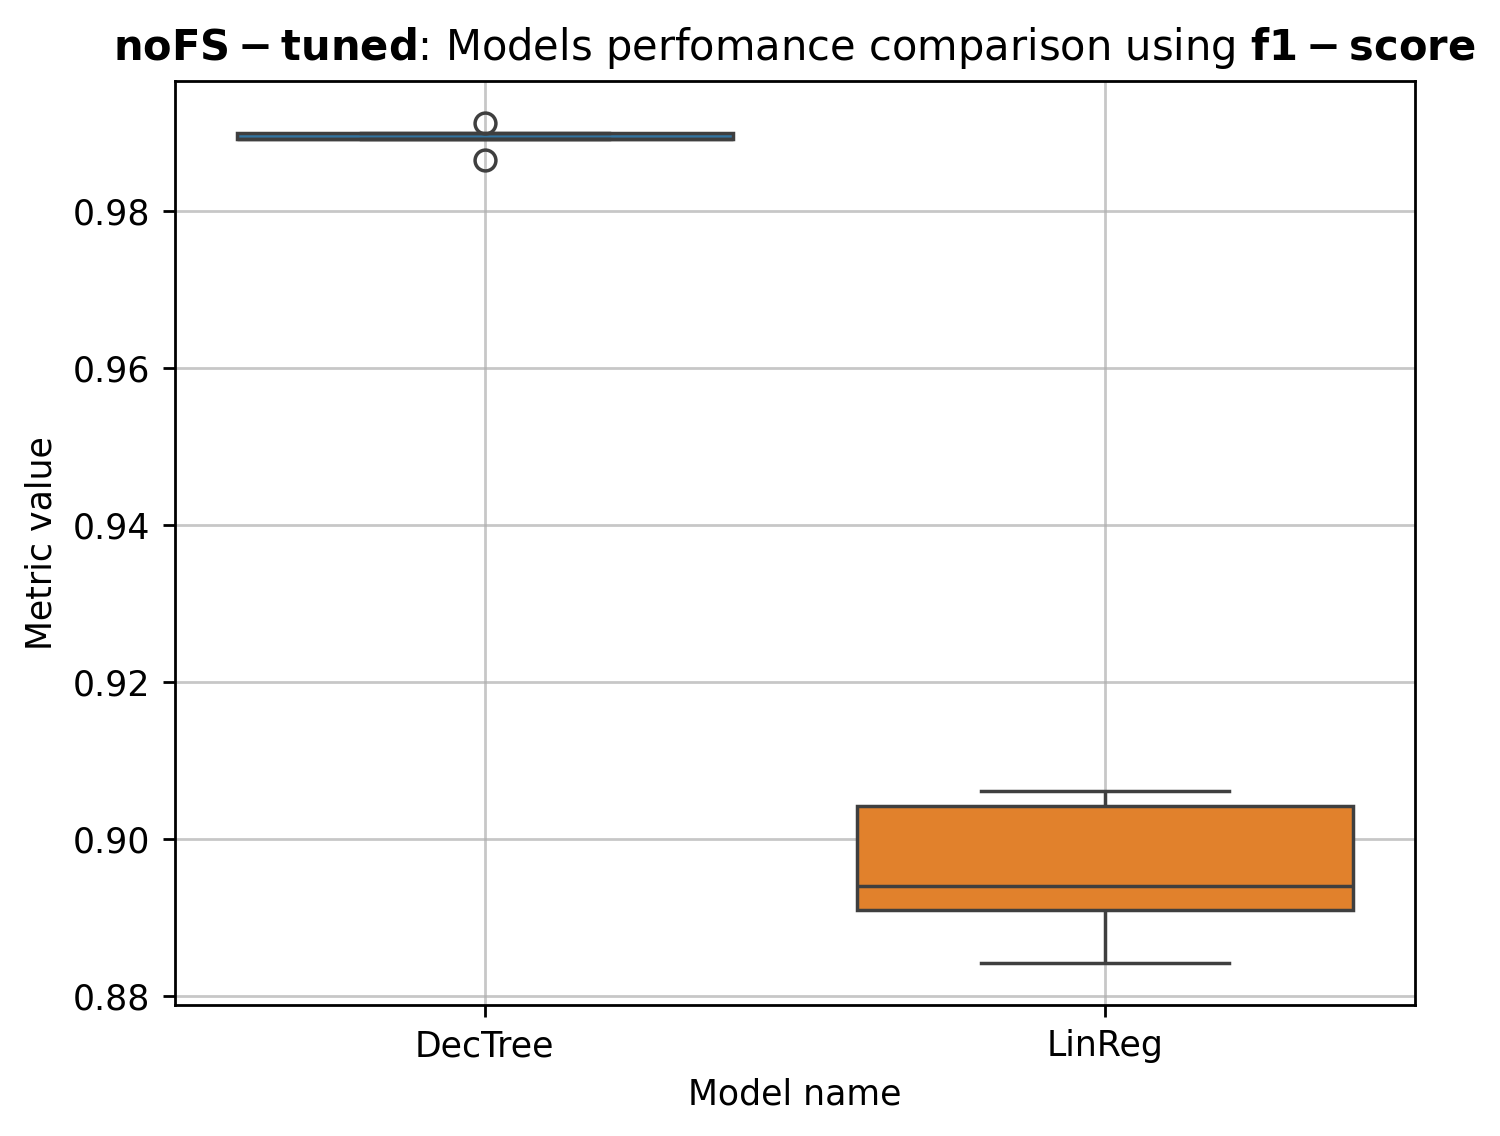

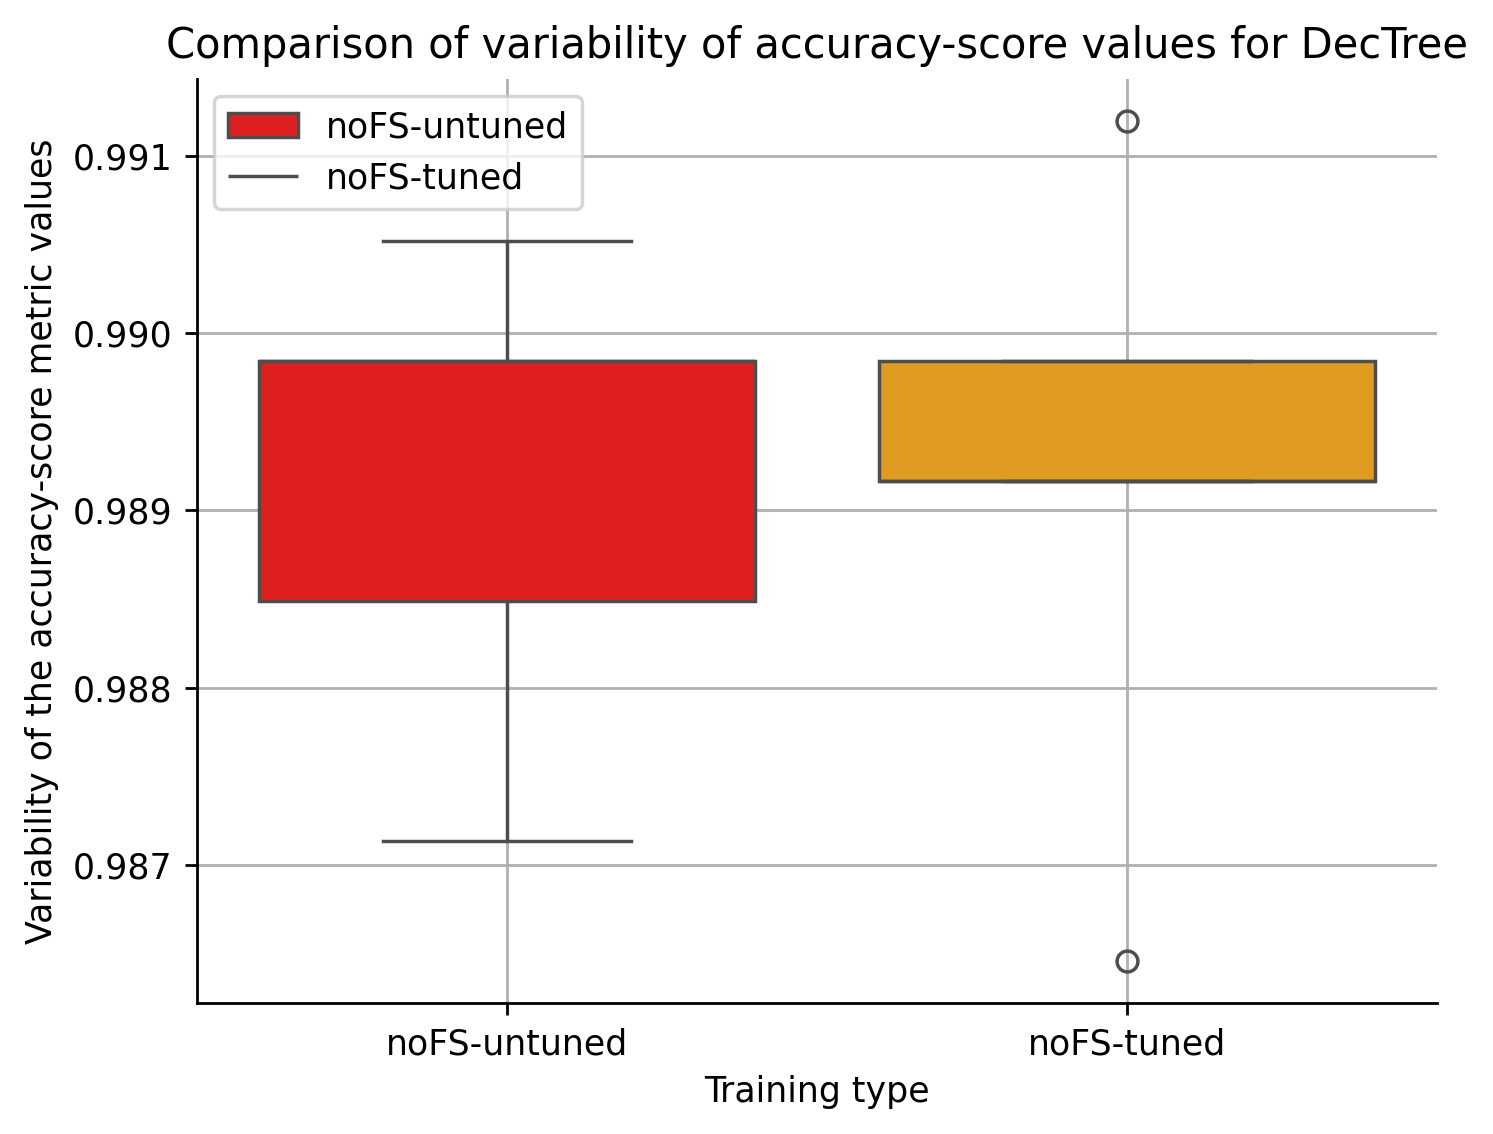

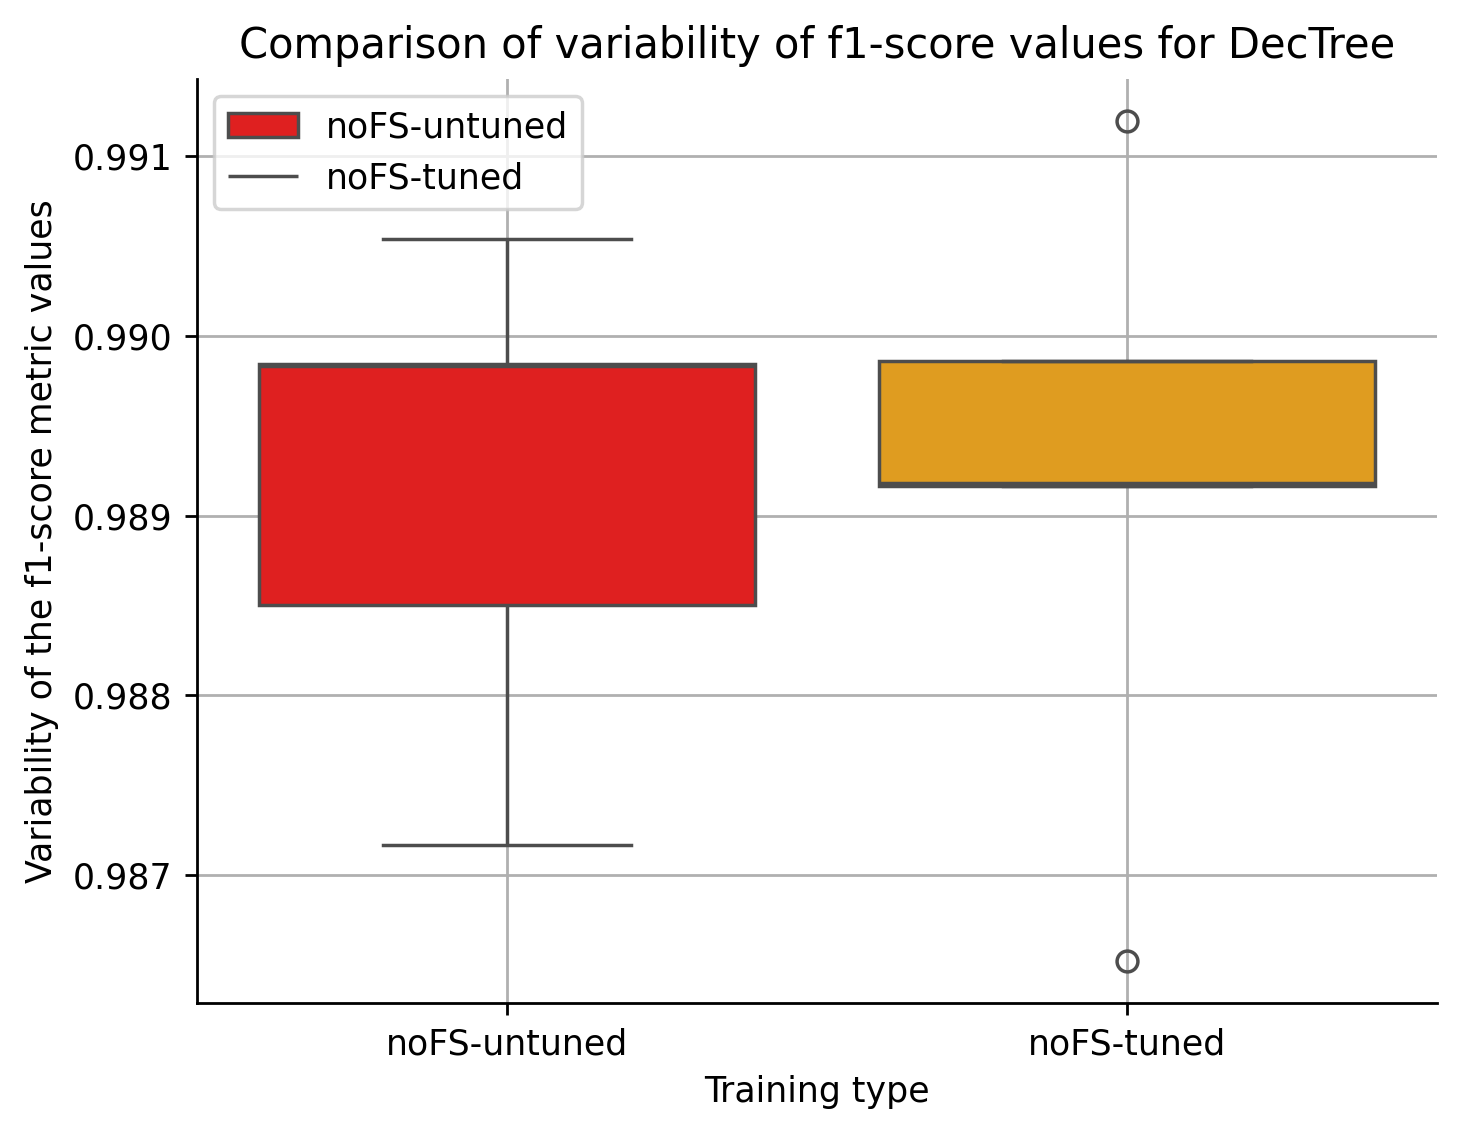

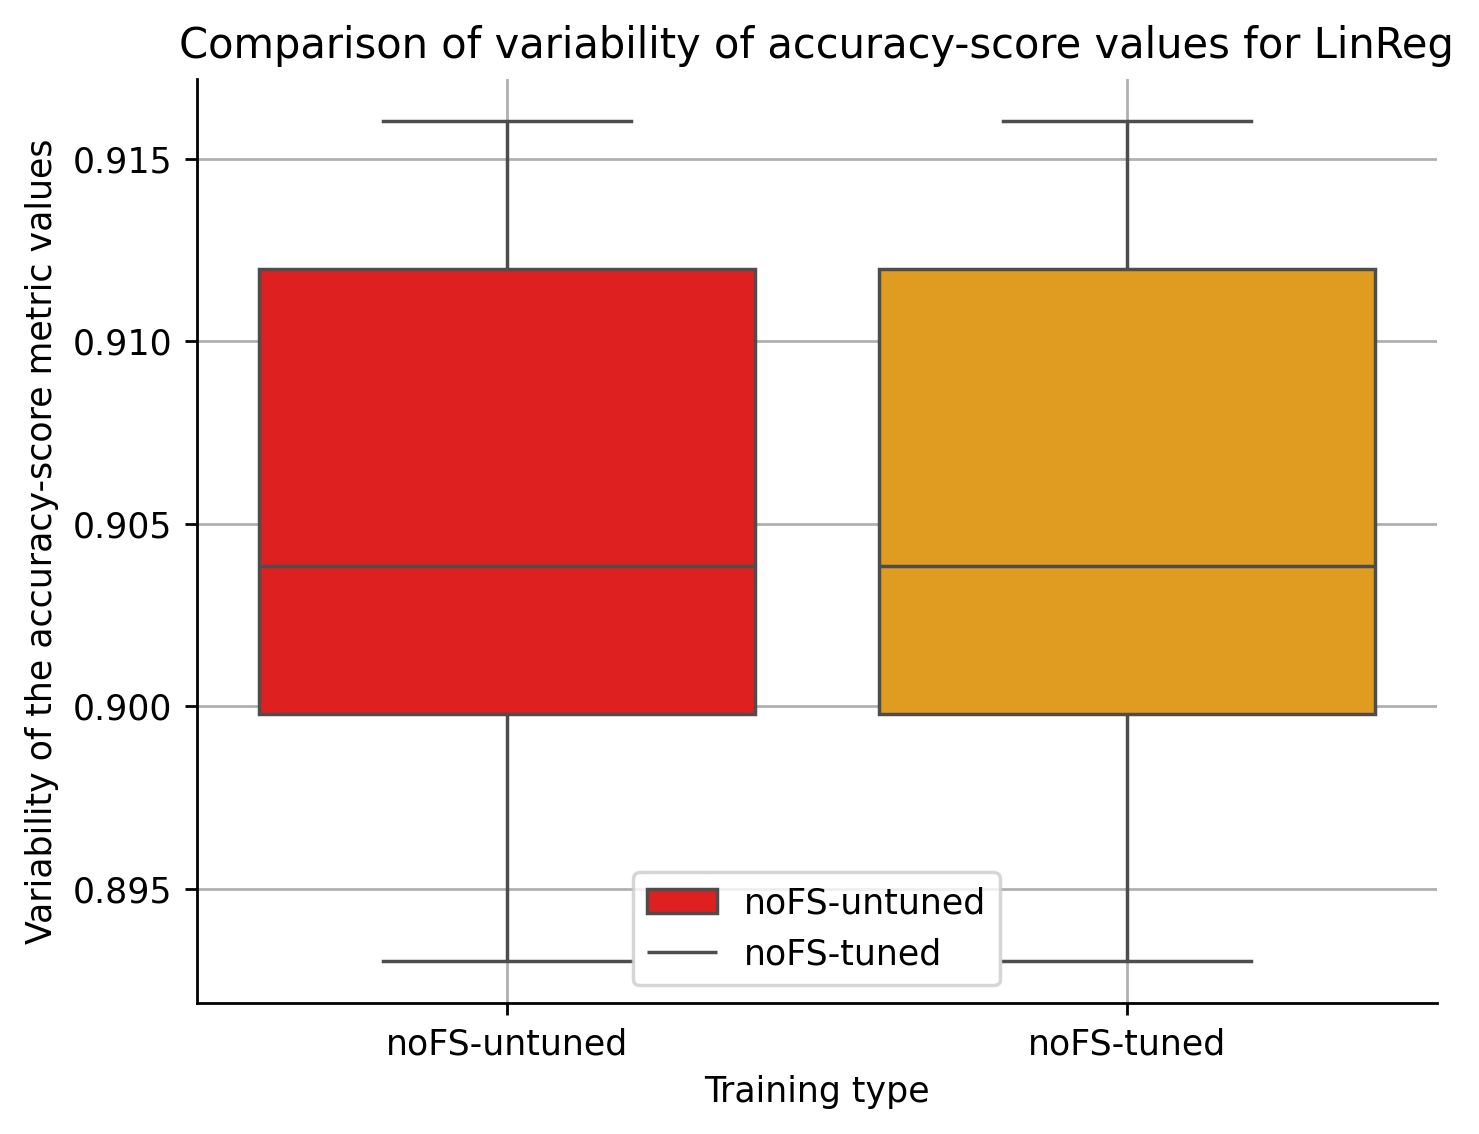

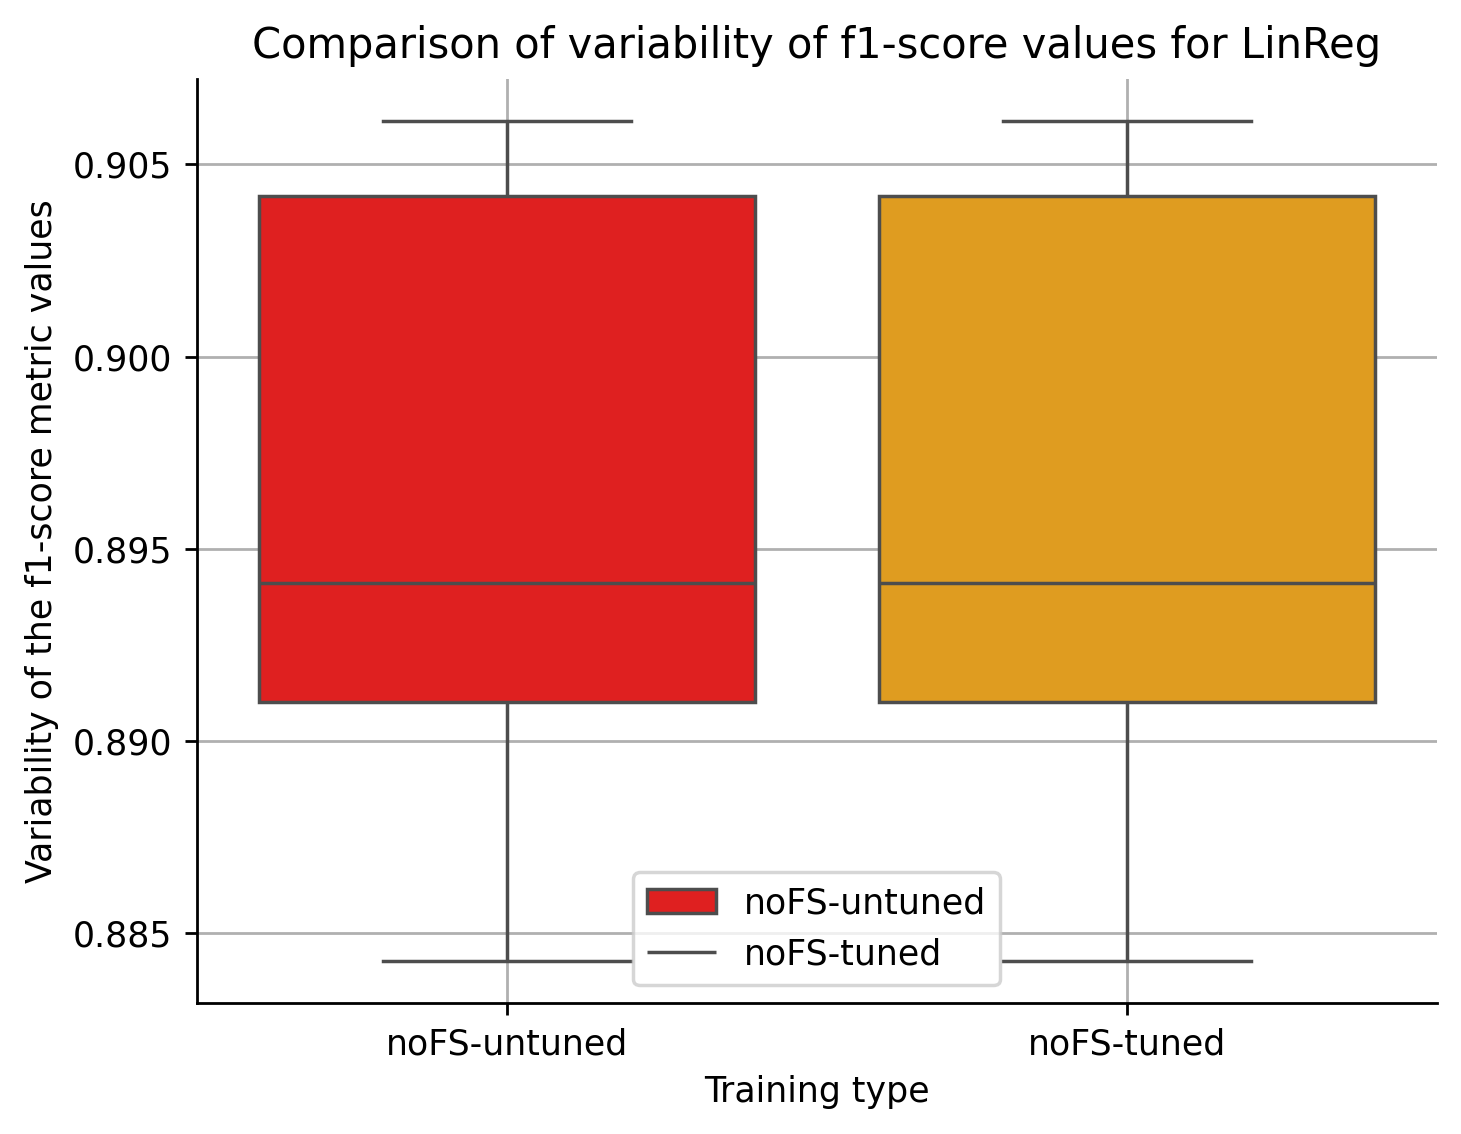

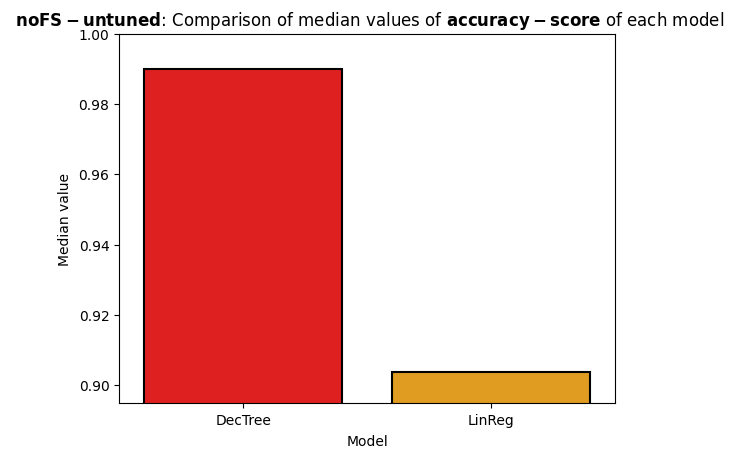

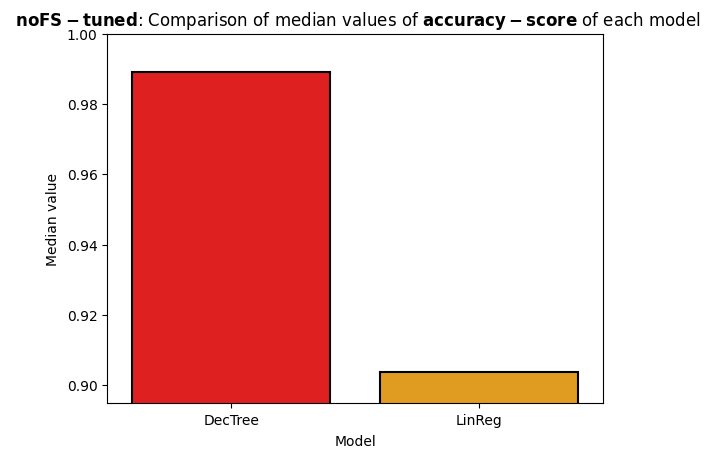

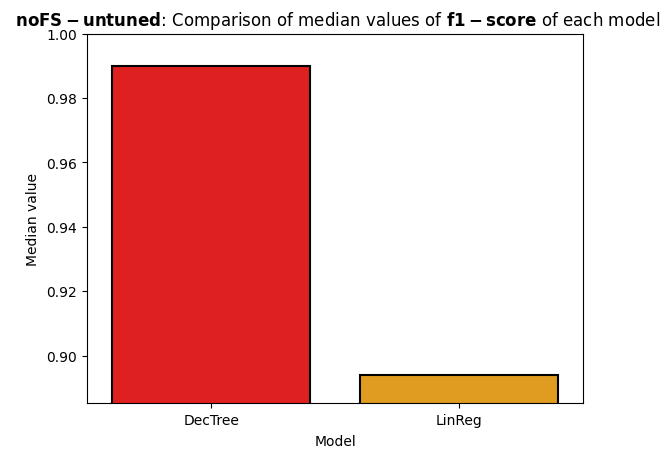

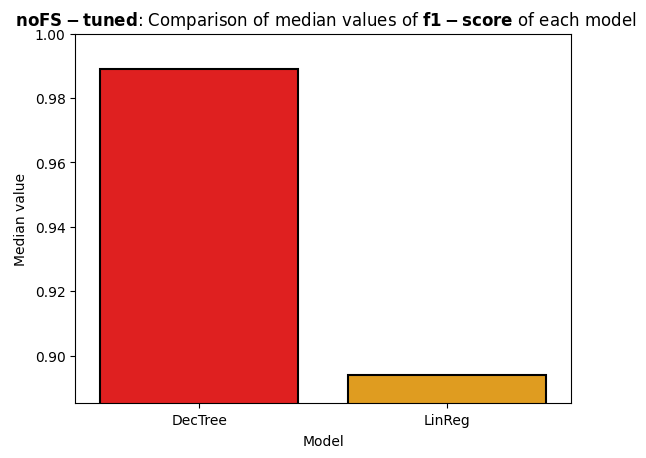

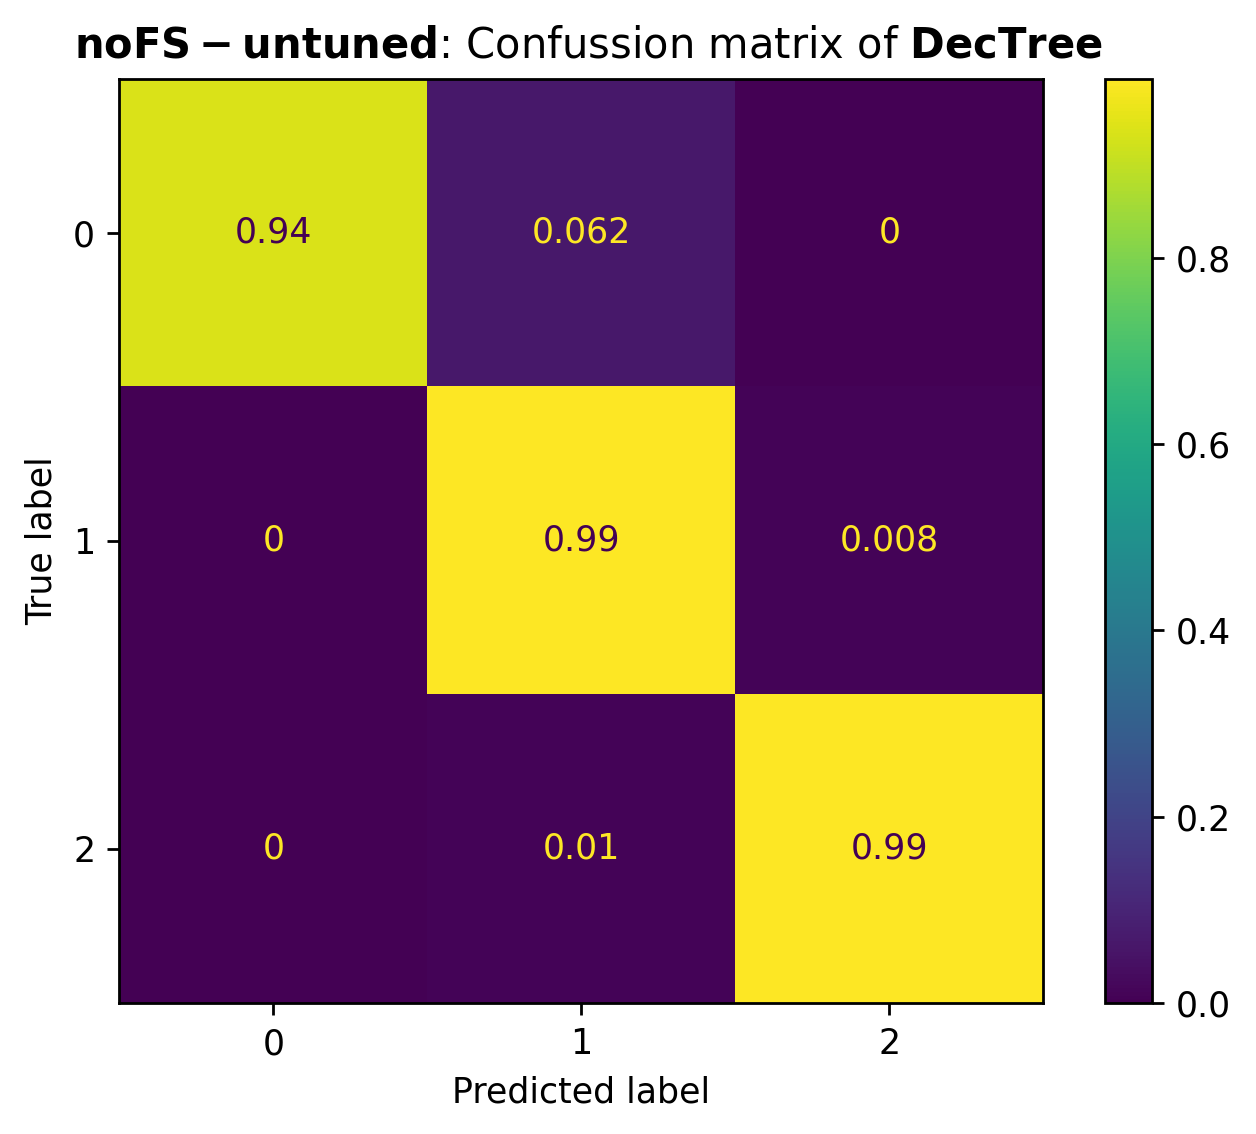

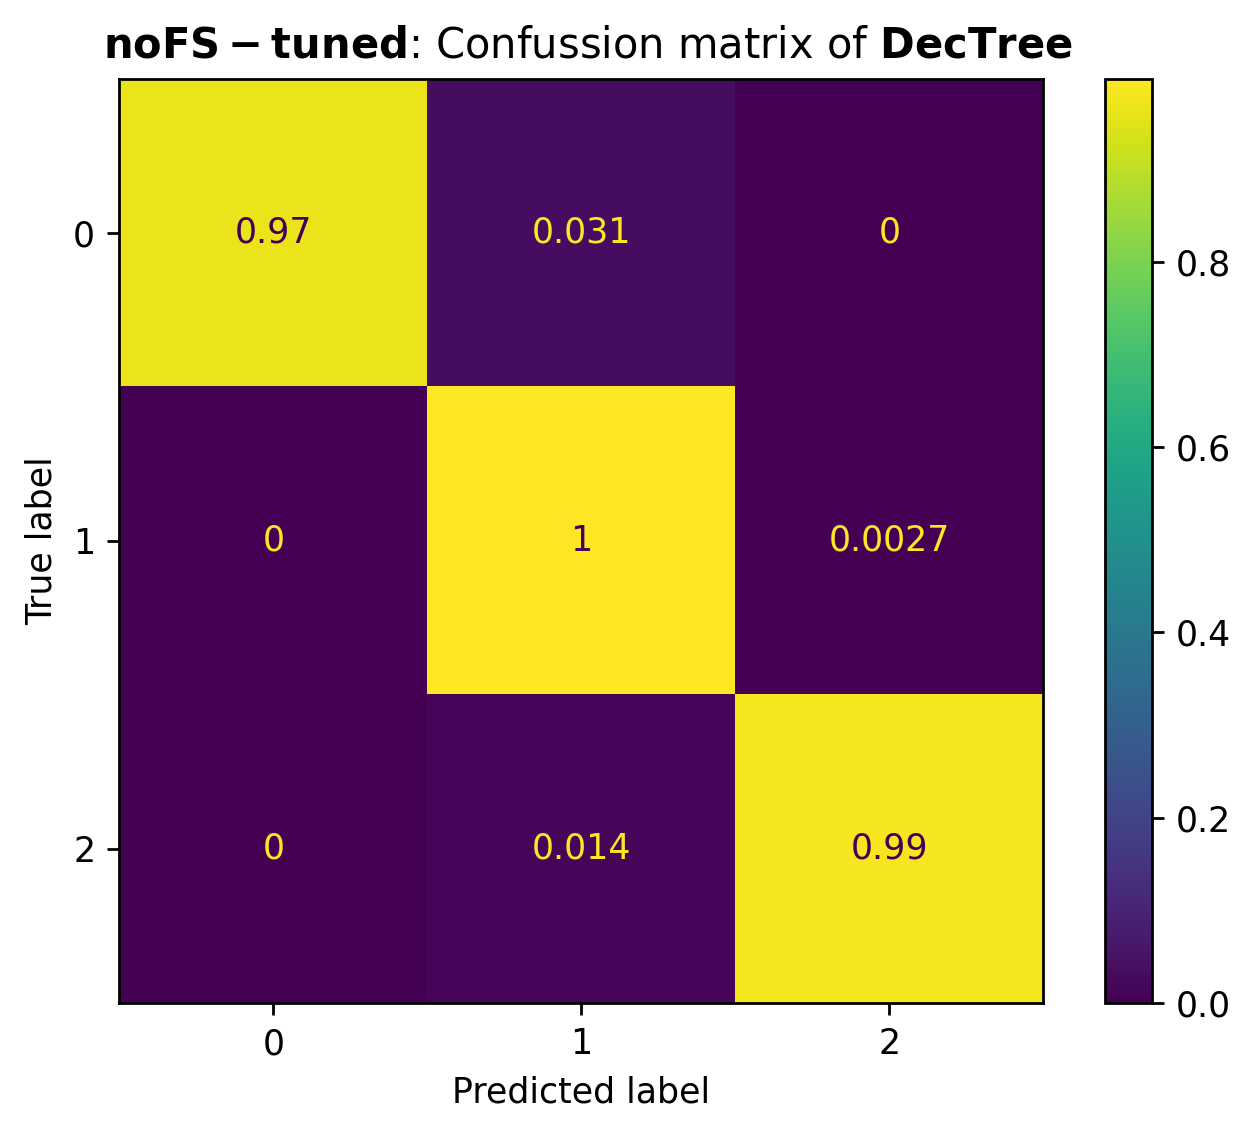

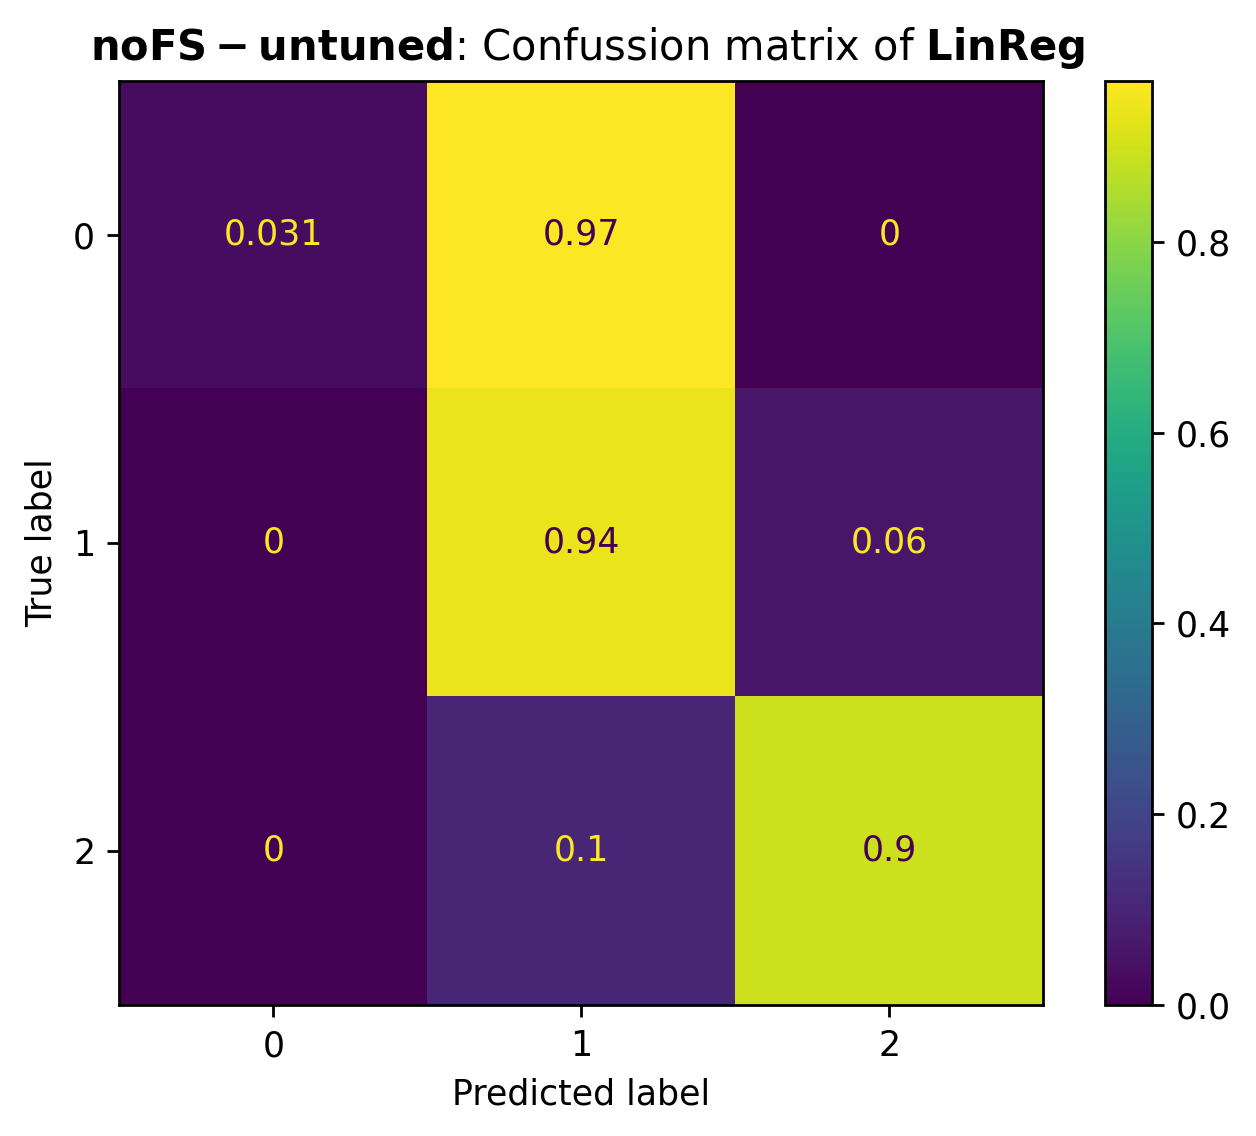

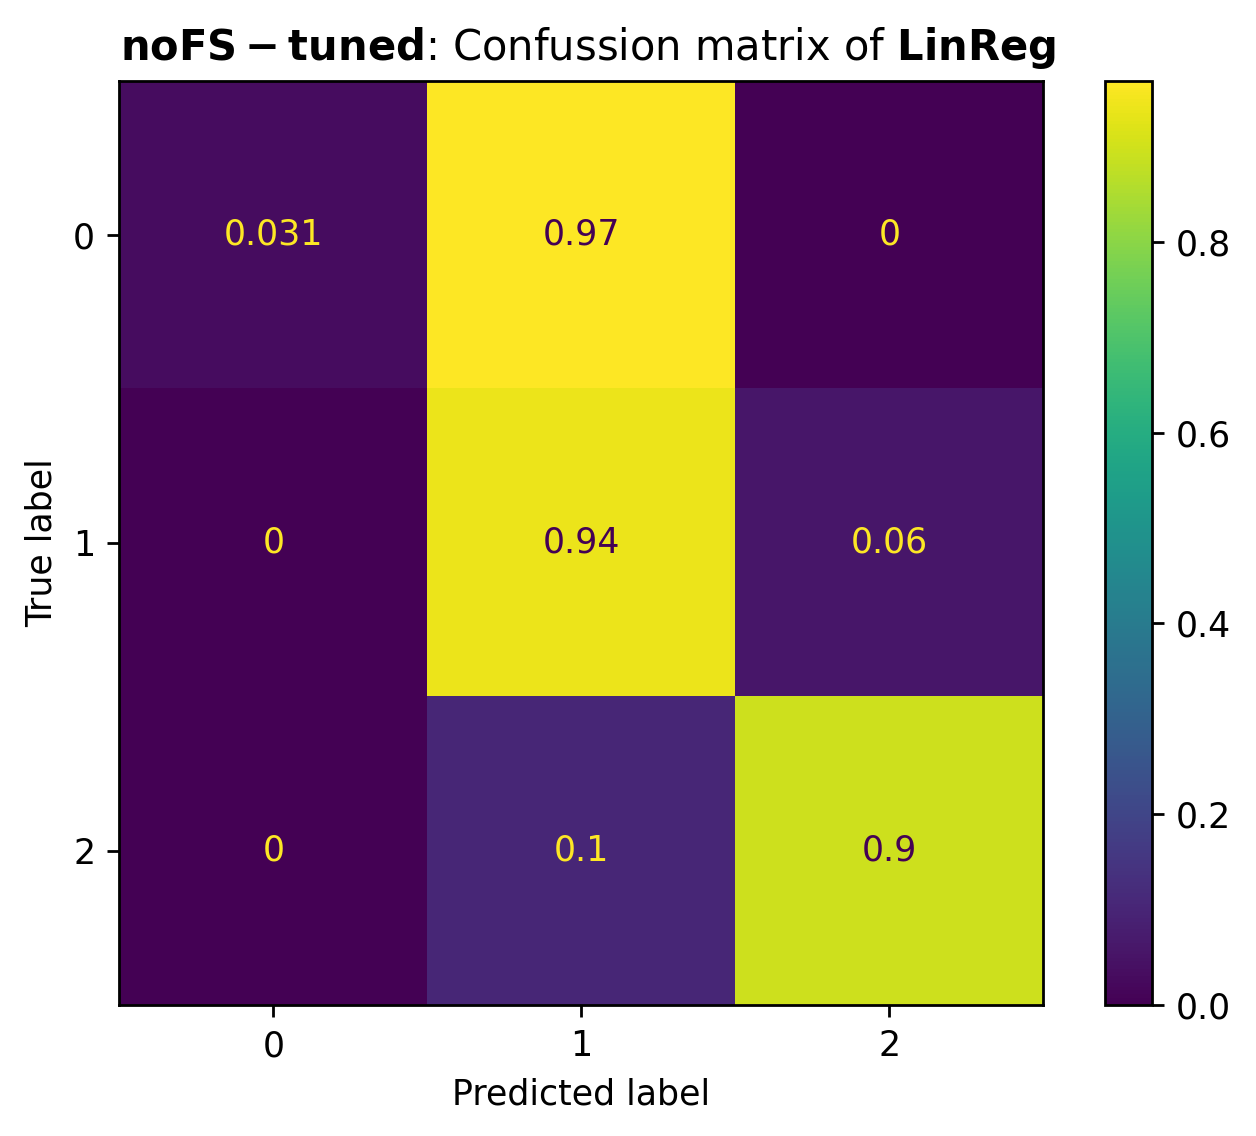

In [114]:
ModelComparator.compare_models()